# Ejercicio - Limpieza de datos y análisis exploratorio de datos

# 0. Pre-requisito

Se debe llevar a cabo la limpieza de datos

# 1. Problema de puntuación de peliculas

Se requiere una limpieza de datos con la ayuda de analisis exploratorio de datos para determinar las caracteristicas de las peliculas.

¿Qué peliculas tienen una mayor probabilidad a ser mejor puntuadas?

# 2. Set de datos despues de la limpieza

La información que se recolecto se encuentra en un archivo NetflixOriginals.csv con 584 filas y 6 columnas.

Cada registro contiene 6 caracteristicas las columnas son:

1. "Title": Titulo (alfabetico)
2. "Genre": Género de la pelicula (Categorica: "action","documentary","thriller","science fiction","horror","mystery","comedy","drama","romantic","anthology","political","superhero","animation","family film","interview","family film","adventure","concert Film","musical","biographical","anime","spy","teen comedy","urban fantasy","crime","biopic","war","sports",dark comedy","one-man show","mockumentary","satire","family","black comedy","psychological","supernatural","variety show","christmas musical","aftershow")
3. "Premiere": Fecha de estreno de una película (Numerica: "08/05/2019","August 21, 2020",... )
4. "Runtime": Tiempo de ejecución de la pelicula (Númerica: "58","81","94","147",...)
5. "IMDB score": Calificación promedio de la película (Númerica: "2.5","3.4","4.2",...)
6. "Languaje": (Categorica: "english","spanish","japanese",...)

# 3. Lectura del dataset

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = "/content/drive/MyDrive/NetflixOriginals.csv"
data = pd.read_csv(ruta, encoding='latin1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.shape)
data.head()

(579, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,documentary,08-05-19,58,2.5,english/japanese
1,Dark Forces,thriller,"August 21, 2020",81,2.6,esp
2,The App,science fiction/drama,"December 26, 2019",79,2.6,italian
3,The Open House,horror thriller,"January 19, 2018",94,3.2,english
4,Kaali Khuhi,mystery,"October 30, 2020",90,3.4,hindi


# 4. Análisis exploratorio

Se llevaran a cabo estas fases:
1. Análisis de cada variable de manera individual
2.Análisis univariado: relación de cada variable predictora con la variable a predecir
3.Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

#4.1 Análisis de cada variable de manera individual

Permitirá entender las caracteristicas generales de cada variable del set de datos

In [ ]:
# Con data.info() se pueden ver las variables categóricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.3+ KB


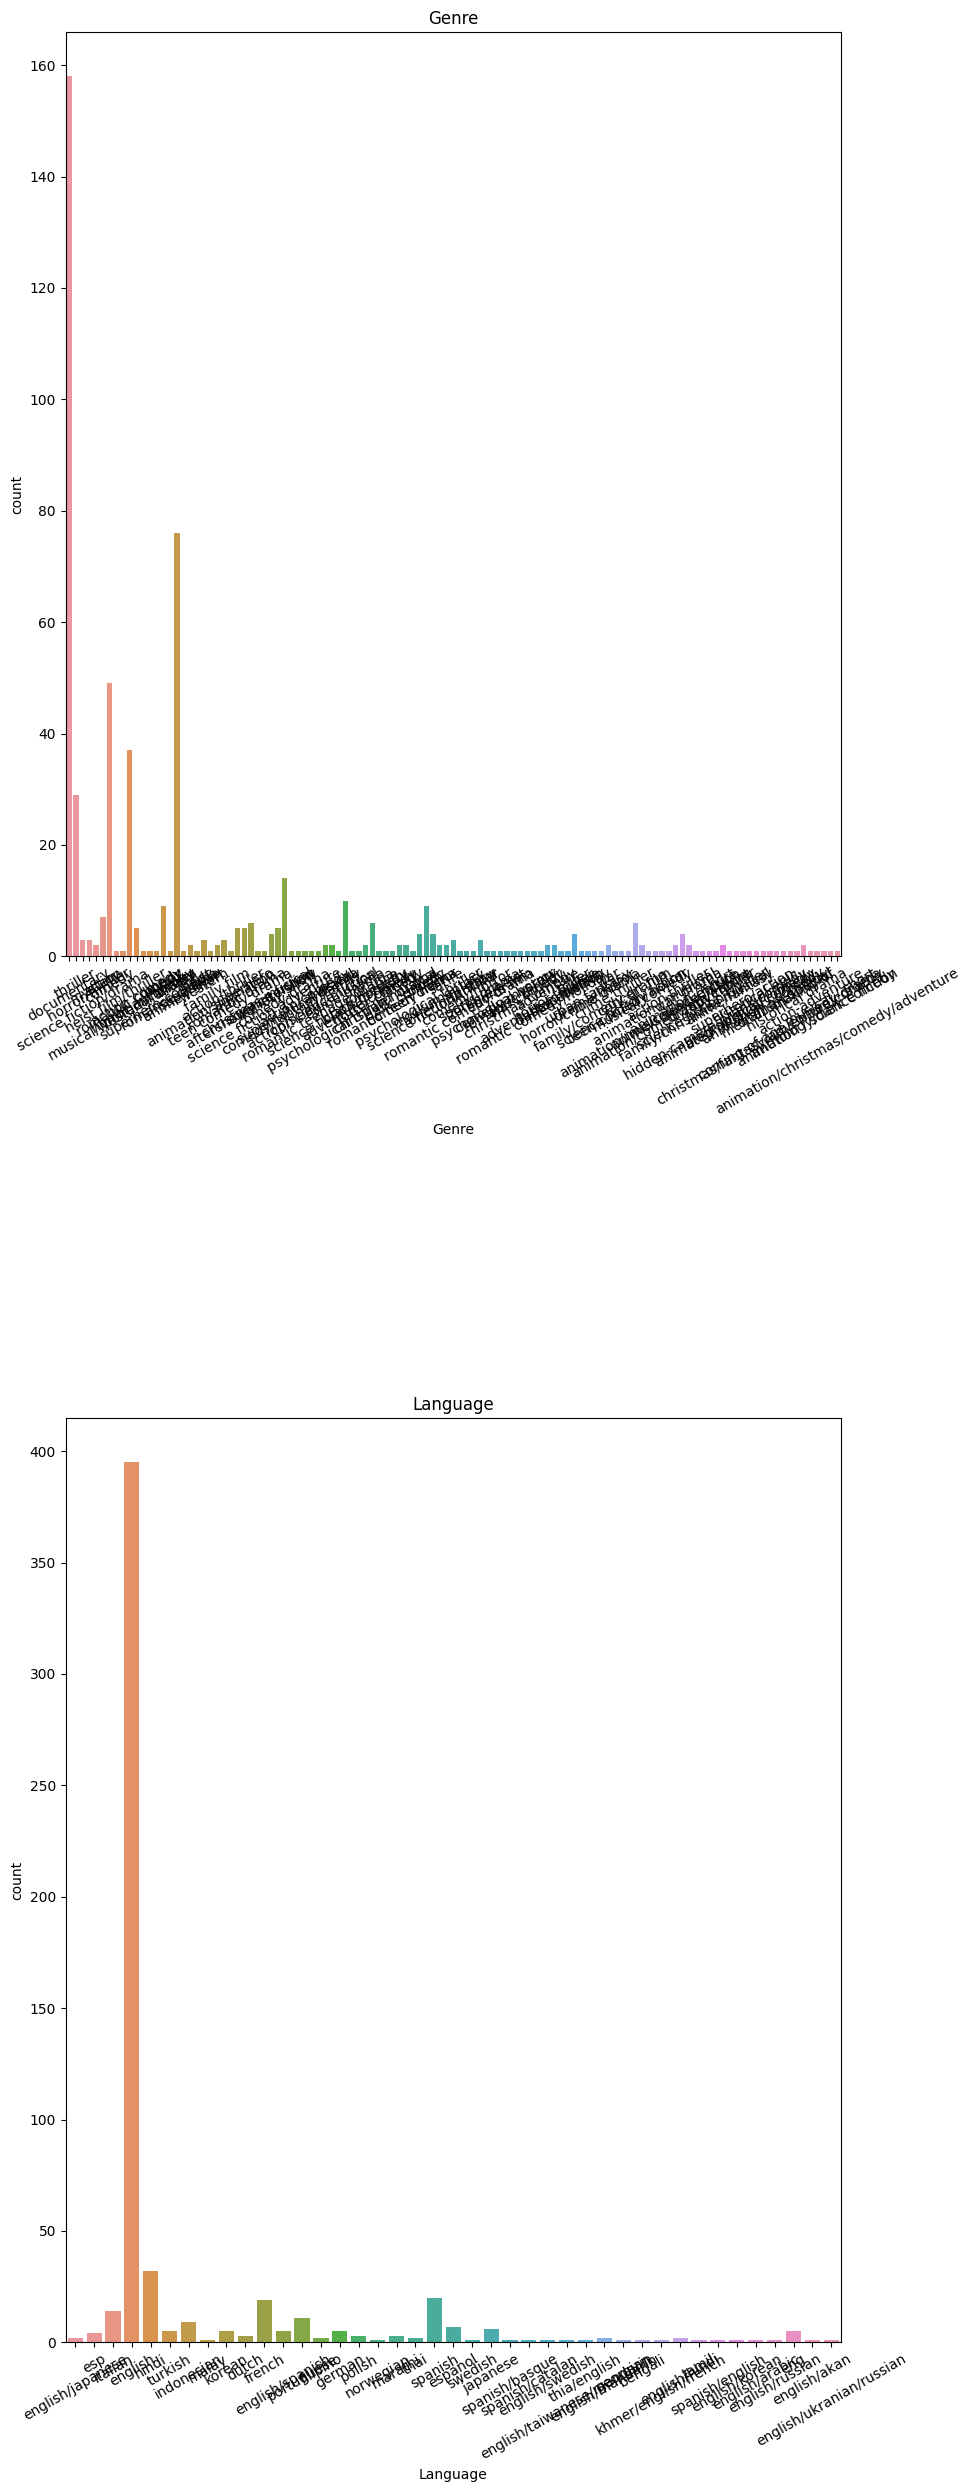

In [ ]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['Genre','Language']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

**Observaciones:**

Niveles de cada variable de interés:

'genre': 130

'languaje': 46


In [ ]:
# Eliminemos las columnas "premiere", "language",

data.drop(columns=['Premiere','Language'],inplace=True)
data.columns

Index(['Title', 'Genre', 'Runtime', 'IMDB Score'], dtype='object')

Se vera el comportamiento inicial de las variables numericas ('runtime' e 'IMDB score')

In [ ]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
data.describe()

,Runtime,IMDB Score
count,579.000000,579.000000
mean,93.497409,6.274784
std,27.846426,0.976765
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.400000
75%,107.500000,7.000000
max,209.000000,9.000000


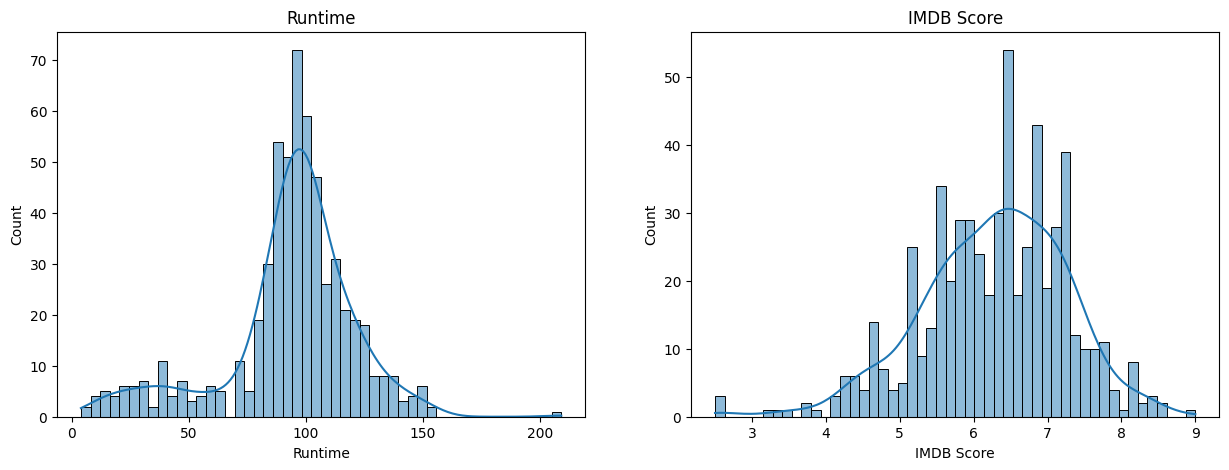

In [ ]:
# Se grafican las variables
# Dibujar histogramas
col_num = ['Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'runtime':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

In [ ]:
# Se verá en detalle lo que ocurre con IMDB
data['IMDB Score'].describe()

count    579.000000
mean       6.274784
std        0.976765
min        2.500000
25%        5.700000
50%        6.400000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

**Observaciones:**

- Se observa que IBDM Score la mayoria es por encima de 6
- Hay un valor alto que se aproxima a 10


#4.2 Análisis univariado
Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('title', 'genre', 'runtime', 'IMDB',)
De esta manera, se conocerá el analisis univariado


In [ ]:
print(data.columns)

Index(['Title', 'Genre', 'Runtime', 'IMDB Score'], dtype='object')


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


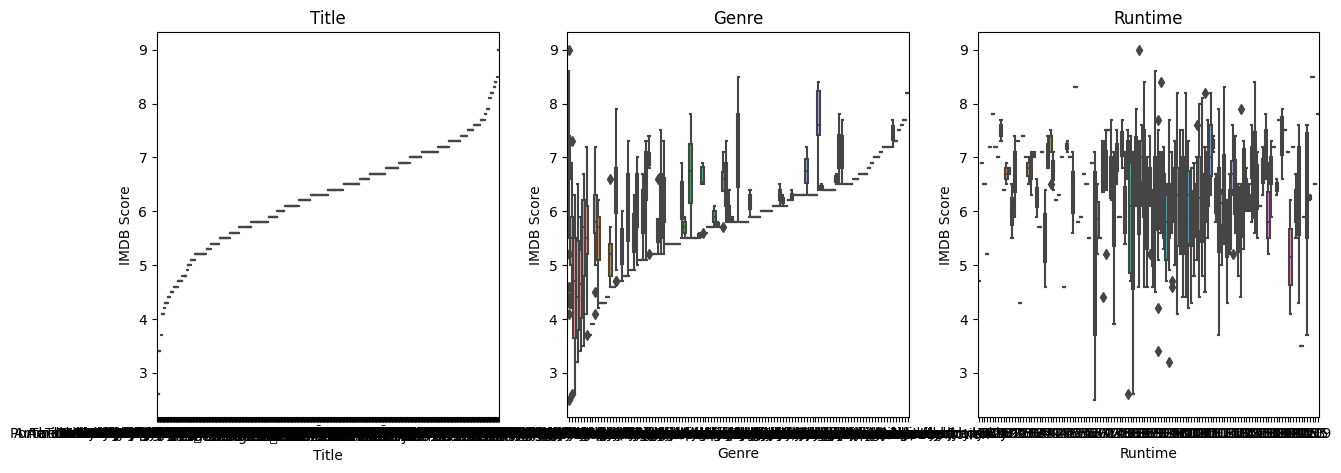

In [ ]:
col_num = ['IMDB Score']
col_cat = ['Title', 'Genre', 'Runtime']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(col_cat):
  bplt = sns. boxplot(x=col, y=col_num[0], data=data, ax=ax[i])

  ax[i].set_title(col)|
  ax[i].set_xticklabels(ax[i].get_xticklabels())

**Observaciones**

Se puede observar que en Title y Genre existen similitudes y tienen mayor probabilidad a ser puntuadas

In [ ]:
# Se realizan las tazas de conversion para asi poder definir los intervvalos de extraccion

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    def graficar_tasas_conversion(var_predictora, var_predecir, type=None, order=None):

    # Y se empieza a generar gráfica de esta manera
      if type=='line':
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='Tasa_conv', data=grupo)
        plt.grid()
      elif type=='bar':
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='Tasa_conv', data=grupo, order=order)
        plt.grid()
      elif type=='scatter':
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='Tasa_conv', data=grupo)
        plt.grid()

graficar_tasas_conversion('Genre', 'IMDB Score')
graficar_tasas_conversion('Title', 'IMDB Score')
graficar_tasas_conversion('Runtime', 'IMDB Score')

In [ ]:
data.loc[(data['Runtime']>0)&(data['Runtime']<50), 'grupos_runtime'] = "0-49"
data.loc[(data['Runtime']>=50)&(data['Runtime']<=99), 'grupos_runtime'] = "50 - 100"
data.loc[data['Runtime']>100,'grupos_runtime'] = ">100"

# Y se grafica la nueva tasa de conversion
graficar_tasas_conversion('grupos_runtime', 'IMDB Score',type='bar')

In [ ]:
graficar_tasas_conversion('Genre','IMDB Score',type='bar')
graficar_tasas_conversion('Title','IMDB Score',type='bar')
graficar_tasas_conversion('Language','IMDB Score',type='bar')

#Conclusion

En resumen la mayor probabilidad de que las peliculas tengan exito será por el titulo, genero e IMDB Score gracias a las graficas representativas